<a href="https://colab.research.google.com/github/amantha6/Data-Formats-and-Image-preprocessing-in-Medical-Imaging/blob/main/CS580E_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CS 480E/580E: Numerical Algorithms
Due September 29th, 11:59 PM

Name:Aditi Mantha \
BU ID: B01031049

**1 Numerical Inversion by Binary Search [16 points]**

---


For this part, you are to write a function named invert that has two required parameters and one optional parameter d. The required parameters are another function f(x) and a y value. Your function should return the x value such that f(x) = y. The function is guaranteed to be non-decreasing, i.e., the derivative is always 0 or positive. If a 3rd argument is given, it will be a tuple (if using Python) representing an interval where the function is guaranteed to be non-decreasing. Otherwise, you may assume that the function is everywhere non-decreasing.

---



Make sure your function always terminates.

Place your function in a separate cell.

You will then apply your invert function to the two functions below.

In [20]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

In [21]:
def invert(f,y,d=None):
  if d==None:
    if d is None:
        low, high = -1e2, 1e2
  else:
    low=d[0]
    high=d[1]
  tolerance=1e-10
  x=(high+low)/2
  while high-low>tolerance:
    mid=(high+low)/2
    if f(mid)>y:
      high=mid
    else:
      low=mid
    x=(high+low)/2
  return x


**Just a test function for testing the data:**

In [22]:
def square(x):
    return x**2

# Use the invert function to find the square root of 4
result = invert(f=square, y=4)
print(result)

1.999999999998181


**1.1 Transcendental Functions [8 points]**

---


Apply your invert function to this function:
In a separate cell, write a test to make sure that your invert routine is able to invert the function everywhere. We leave it up to you to think about how to design and implement such a test.

In [23]:
def transcendental(x):
  return x*math.exp(x)+x

In [24]:
# Calling the function here, with y=10
result = invert(f=transcendental, y=10)

# Printing the results with labels
print("The x value such that f(x) = 10 is approximately:", result)
print("Verification: The value of f(x) at this x is:", transcendental(result))


The x value such that f(x) = 10 is approximately: 1.6335061701738596
Verification: The value of f(x) at this x is: 10.00000000026098


**1.2 Gamma Function [8 points]**

---


The gamma function is component of many probability distribution functions and has a wide range of applications in probability, statistics, and physics. The gamma function is defined as an improper integral:
In a new cell, write a test to make that your invert routine is able to invert the Gamma function in the domain
. You may use the gamma function defined in SciPy.

In [25]:
from scipy.special import gamma


In [26]:
x_result = invert(f=gamma, y=10, d=(1.5, 16))

# Printing results
print("The x value that gives Gamma(x) =", 10, "is approximately:", x_result)
print("Verification: Gamma(", x_result, ") =", gamma(x_result))

The x value that gives Gamma(x) = 10 is approximately: 4.3900776508135095
Verification: Gamma( 4.3900776508135095 ) = 9.999999999732776


## **2 Numerical Integration [7 points]**

---


A large class of continuous functions do not have closed-form solutions for their antiderivatives. In this case, the definite integral over a range can be computed numerically. Write a function integrate that has two parameters: another function f(x) and a tuple representing the range of integration. Your function should return the definite integral of the function f(x), computed over the given range.

Place your function in a separate cell.

Reference to understand Monte Carlo Integration in Python: https://www.youtube.com/watch?v=WAf0rqwAvgg

In [27]:
def monte_carlo_integration(f, a, b, num_samples=10000):
    """
    Approximate the integral of a function f over the range [a, b]
    using the Monte Carlo method.

    Parameters:
    f : function - The function to integrate.
    a : float - The lower bound of the integration interval.
    b : float - The upper bound of the integration interval.
    num_samples : int - The number of random samples to generate.

    Returns:
    float - The estimated integral of the function.
    """

    x_random = np.random.uniform(low=a, high=b, size=num_samples)
    fx_random = f(x_random)
    average_fx = np.mean(fx_random)
    integral_estimate = (b - a) * average_fx
    return integral_estimate

**Test Example**

In [28]:
import numpy as np
# Example usage: integrate the function f(x) = x over [0, 1]
result = monte_carlo_integration(lambda x: x, 0, 1)
print("Estimated integral of f(x) = x^2 from 0 to 1:", result)

Estimated integral of f(x) = x^2 from 0 to 1: 0.4952506467628753


Place your function in a separate cell.


---


In the following cell define the function below, and compute the definite integral numerically using your integrate function.

---




You may use Monte Carlo or other sampling-based methods, as long as the program terminates in a reasonable amount of time. Your function should return the integral value with as high a precision as possible.

In [29]:
def sin(x):
    return  np.sin(x) / x

In [30]:
result = monte_carlo_integration(sin, -1, 1)
print("Estimated integral of sin(x) from -1 to 1 is:", result)


Estimated integral of sin(x) from -1 to 1 is: 1.891893962291112


# **3 Gradient Descent [39 points]**

---


For this part, you will write a gradient descent optimizer and use it to minimize some functions. In the below, we’ll call the function to be optimized f. Write a function opt with four parameters: a function grad(p), a tuple start giving the starting point of the optimization, the step size step, and a maximum gradient length to be used for gradient clipping. The function grad(p) should accept a point p as a tuple and returns a tuple giving the gradient of f at p.

---



Your function opt should return an array of tuples consisting of the sequence of points where the gradient is evaluated, starting from the start point. The last element of the returned array should be the point that minimizes f. The point may be a local mininum.

---



A common problem in gradient descent is that the actual change to the current point depends on the gradient. If the gradient is very large, that can cause "overshooting" the minimum. One technique to address this issue is "gradient clipping"--simply clip the gradient to some upper bound.

---



Note: Make sure your function always terminates.

Place your function in a separate cell. You will then apply your opt function to two functions below.

In [31]:
import numpy as np

def opt(grad, start, step, max_grad_len, max_iters=1000, tol=1e-6):
    """
    Gradient descent optimizer with gradient clipping.

    Parameters:
    - grad: A function that accepts a point p as a tuple and returns the gradient at that point as a tuple.
    - start: A tuple representing the starting point of the optimization.
    - step: Step size for each iteration.
    - max_grad_len: Maximum gradient length for clipping.
    - max_iters: Maximum number of iterations (default is 1000).
    - tol: Tolerance for stopping criteria based on how small the changes in points are (default is 1e-6).

    Returns:
    - A list of tuples, where each tuple is a point in the sequence of points evaluated.
      The last point will be the final approximation of the minimum.
    """

    points = [start]
    current_point = np.array(start)

    for _ in range(max_iters):
        current_grad = np.array(grad(tuple(current_point)))
        grad_len = np.linalg.norm(current_grad)

        # Gradient clipping if the gradient length exceeds the max_grad_len
        if grad_len > max_grad_len:
            current_grad = (current_grad / grad_len) * max_grad_len

        # Update the point
        new_point = current_point - step * current_grad
        points.append(tuple(new_point))

        # Check if the change in point is below the tolerance
        if np.linalg.norm(new_point - current_point) < tol:
            break

        current_point = new_point

    return points

**3.1 Three-Hump Camel Function [15 points]**


---


The three-hump camel function is a two-dimensional function often used to benchmark optimization methods. It has multiple extrema. The three-hump camel function is defined as:


---



Implement the function thcf with a single tuple parameter p, giving the coordinates and to evaluate the function.


---


Implement the gradient function, thcf_grad that accepts a point and returns the gradient of that point, both as tuples.
In this cell, put in code that checks using a finite differnce that your thcf_grad function is implemented correctly. It should use randomization of the point at which to check the gradient, and allow running for any number of checks. It should be as convincing as possible.
Find the global minimum, possibly using multiple runs of your opt function. Your code should not have a hard-coded starting point.
Generate a surface plot or contour plot of the function, showing the path of the gradient descent that found the global minimum. You can use the matplotlib library.

In [32]:


def thcf(p):
    x1, x2 = p
    return 2 * x1**2 - 1.05 * x1**4 + (x1**6) / 6 + x1 * x2 + x2**2



Implement the gradient function, thcf_grad that accepts a point and returns the gradient of that point, both as tuples.


---



In [33]:

def thcf_grad(p):
    x1, x2 = p
    df_dx1 = 4 * x1 - 4.2 * x1**3 + x1**5 + x2
    df_dx2 = x1 + 2 * x2
    return (df_dx1, df_dx2)

In this cell, put in code that checks using a finite differnce that your thcf_grad function is implemented correctly. It should use randomization of the point at which to check the gradient, and allow running for any number of checks. It should be as convincing as possible.


---



In [34]:

def finite_difference(f, p, h=1e-6):
    grad_approx = []
    p = np.array(p)
    for i in range(len(p)):
        p_plus_h = np.copy(p)
        p_plus_h[i] += h
        grad_i = (f(p_plus_h) - f(p)) / h
        grad_approx.append(grad_i)
    return tuple(grad_approx)


Find the global minimum, possibly using multiple runs of your opt function. Your code should not have a hard-coded starting point.


---



In [35]:
def global_minimum(f, grad_f, num_runs=10, step_size=0.01, max_grad=1.0):
    best_min_point = None
    best_min_value = float('inf')
    best_path = []

    for run in range(num_runs):
        start_point = (np.random.uniform(-5, 5), np.random.uniform(-5, 5))
        points = opt(grad_f, start_point, step_size, max_grad)
        final_point = points[-1]
        final_value = f(final_point)

        if final_value < best_min_value:
            best_min_point = final_point
            best_min_value = final_value
            best_path = points

        print(f"Run {run+1}: Final Point: {final_point}, Final Value: {final_value}")

    print(f"\nBest Minimum Found: Point = {best_min_point}, Value = {best_min_value}")

    if best_path:
        plot(f, best_path)

    return best_min_point, best_min_value

Generate a surface plot or contour plot of the function, showing the path of the gradient descent that found the global minimum. You can use the matplotlib library.


---



**3.2 2-D Shubert Function [24 points]**

---


The Shubert function is an N-dimensional function also often used to benchmark optimization methods. It also has many local and global minima that are irregularly distributed in the domain. The 2-D Shubert function is defined as:

For this part, you should implement the following, each in a separate cell:


---



Implement the function sf with a single tuple parameter p, giving the coordinates
 and
 to evaluate the function.

In [36]:
def sf(p):
    x1, x2 = p
    sum1 = sum(i * np.cos((i + 1) * x1 + i) for i in range(1, 6))
    sum2 = sum(i * np.cos((i + 1) * x2 + i) for i in range(1, 6))
    return sum1 * sum2

Implement the gradient function, sf_grad that accepts a point and returns the gradient of that point, both as tuples.


---



In [37]:
def sf_grad(p):
    x1, x2 = p
    sum1_x1 = sum(i * np.cos((i + 1) * x1 + i) for i in range(1, 6))
    sum2_x2 = sum(i * np.cos((i + 1) * x2 + i) for i in range(1, 6))
    d_sum1_dx1 = sum(-i * (i + 1) * np.sin((i + 1) * x1 + i) for i in range(1, 6))
    d_sum2_dx2 = sum(-i * (i + 1) * np.sin((i + 1) * x2 + i) for i in range(1, 6))
    df_dx1 = d_sum1_dx1 * sum2_x2
    df_dx2 = sum1_x1 * d_sum2_dx2
    return (df_dx1, df_dx2)
test_point = (1, 2)
gradient = sf_grad(test_point)
print(f"Gradient of Shubert function at {test_point}: {gradient}")

Gradient of Shubert function at (1, 2): (-15.919391708451052, -30.33727410135966)


In this cell, put in code that checks using a finite differnce that your sf_grad function is implemented correctly. It should use randomization of the point at which to check the gradient, and allow running for any number of checks. It should be as convincing as possible.


---



In [38]:
def finite_difference_grad(f, p, h=1e-6):
    grad_approx = []
    p = np.array(p)
    for i in range(len(p)):
        p_plus_h = np.copy(p)
        p_plus_h[i] += h
        grad_i = (f(p_plus_h) - f(p)) / h
        grad_approx.append(grad_i)
    return tuple(grad_approx)

Find the global minimum, possibly using multiple runs of your opt function. Your code should not have a hard-coded starting point.


---



In [39]:
def global_minimum(f, grad_f, num_runs=10, step_size=0.01, max_grad=1.0):
    best_min_point = None
    best_min_value = float('inf')
    best_path = []

    for run in range(num_runs):
        start_point = (np.random.uniform(-10, 10), np.random.uniform(-10, 10))
        points = opt(grad_f, start_point, step_size, max_grad)
        final_point = points[-1]
        final_value = f(final_point)
        if final_value < best_min_value:
            best_min_point = final_point
            best_min_value = final_value
            best_path = points
        print(f"Run {run+1}: Final Point: {final_point}, Final Value: {final_value}")
    print(f"\nBest Minimum Found: Point = {best_min_point}, Value = {best_min_value}")

    return best_min_point, best_min_value, best_path
best_point, best_value, best_path = global_minimum(sf, sf_grad, num_runs=10)

Run 1: Final Point: (3.766823052969763, -3.0031585862219714), Final Value: -12.955957014453448
Run 2: Final Point: (-9.786135930886685, -9.286343893401561), Final Value: -9.531811522351623
Run 3: Final Point: (-0.8003211004719731, -2.5168913042467755), Final Value: -52.00763334079623
Run 4: Final Point: (-7.708313735499347, -2.999454175345084), Final Value: -46.499425356134864
Run 5: Final Point: (-4.963181056421861, 2.78302093240726), Final Value: -7.726397696427087
Run 6: Final Point: (8.589980034837291, -1.425128428319761), Final Value: -37.61398190817295
Run 7: Final Point: (-8.290388011562388, -2.502537516066494), Final Value: -22.10028407886201
Run 8: Final Point: (-5.461401381421619, 1.325703508457563), Final Value: -10.971012611954
Run 9: Final Point: (-2.503811971799098, 4.275982602796778), Final Value: -22.110216390455747
Run 10: Final Point: (-4.474050941843339, 8.582414165008702), Final Value: -7.9814074007189815

Best Minimum Found: Point = (-0.8003211004719731, -2.5168913

## 4 Random Variates [38 points]


---


### 4.1 Rejection Sampling [15 points]


---


The function
 could be used to define a PDF, over the domain 0 to
. However, one of the properties of any PDF is that it must integrate to one. This can generally be met by normalization: simply integrating function over the domain, and dividing it by the value of the definite integral to obtain the actual PDF.


---



For this part, you must:

First, correct the candidate PDF
 by normalizing it. Put how you did this in a Markdown cell. You may use tools such as Mathematica if you wish, but explain how you did it.
Then, in another cell, write a function named pdf_sin2(n) that generates n variates according to the PDF, and returns them in a list. Use rejection sampling. You can use a simple uniform distribution as your proposal distribution. If you wish, you may also use a proposal distribution that more closely envelopes (bounds) the target distribution. A different point must be generated each time it is called, but it is okay if the same sequence is generated. (No need to seed.)


---


Lastly, in a third cell, convince us that you have done it correctly. You should not try to prove it mathematically, but rather do something like generate a histogram of samples from your pdf_sin2 function, and plot it against the actual PDF.

## Step 1: Normalization

In [51]:
def sin_squared(x):
    return (np.sin(x**2))**2
integral_estimate = monte_carlo_integration(sin_squared, 0, np.pi, 100000)
print("Estimated integral using Monte Carlo:", integral_estimate)

Estimated integral using Monte Carlo: 1.3259160124965708


In [52]:
def pdf_sin2(x):
    return sin_squared(x) / integral_estimate

## Step 2: Rejection Sampling

In [53]:
def rejection_sampling(pdf, domain, n_samples, scale):
    samples = []
    while len(samples) < n_samples:
        x_proposal = np.random.uniform(domain[0], domain[1])
        y_proposal = np.random.uniform(0, scale)
        if y_proposal < pdf(x_proposal):
            samples.append(x_proposal)
    return samples
x_vals = np.linspace(0, np.pi, 1000)
scale = 1.2 * max([pdf_sin2(x) for x in x_vals])
samples = rejection_sampling(pdf_sin2, (0, np.pi), 10000, scale)

## Step 3: Visualization

In [56]:
# y_vals = [pdf_sin2(x) for x in x_vals]

# plt.figure(figsize=(10, 6))
# plt.hist(samples, bins=30, density=True, alpha=0.5, label='Sampled Data')
# plt.plot(x_vals, y_vals, 'r-', label='Actual Normalized $\\sin^2(x^2)$')
# plt.title('Monte Carlo Samples vs. Actual Normalized PDF')
# plt.xlabel('x')
# plt.ylabel('PDF')
# plt.legend()
# plt.show()

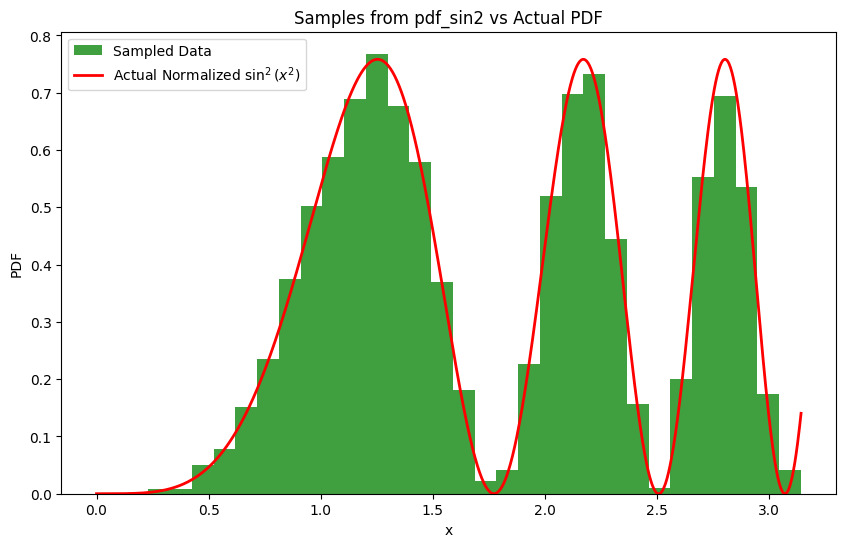